# Surfline's Data Challenge
- Code by: Stephen Scherrer
- Written On: 16 Feb 2021

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Data-Challenge-Details" data-toc-modified-id="Data-Challenge-Details-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Data Challenge Details</a></span></li><li><span><a href="#Preprocessing-the-Data" data-toc-modified-id="Preprocessing-the-Data-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Preprocessing the Data</a></span><ul class="toc-item"><li><span><a href="#Loading-and-Cleaning-Data" data-toc-modified-id="Loading-and-Cleaning-Data-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Loading and Cleaning Data</a></span></li></ul></li><li><span><a href="#Exploratory-Data-Analysis" data-toc-modified-id="Exploratory-Data-Analysis-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Exploratory Data Analysis</a></span></li><li><span><a href="#Predictive-Modeling" data-toc-modified-id="Predictive-Modeling-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Predictive Modeling</a></span><ul class="toc-item"><li><span><a href="#Comparison-to-baseline-model" data-toc-modified-id="Comparison-to-baseline-model-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Comparison to baseline model</a></span></li><li><span><a href="#Calculating-feature-importance" data-toc-modified-id="Calculating-feature-importance-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Calculating feature importance</a></span></li><li><span><a href="#Refittng-Model-with-Additional-Data" data-toc-modified-id="Refittng-Model-with-Additional-Data-4.3"><span class="toc-item-num">4.3&nbsp;&nbsp;</span>Refittng Model with Additional Data</a></span><ul class="toc-item"><li><span><a href="#Refitting-Model" data-toc-modified-id="Refitting-Model-4.3.1"><span class="toc-item-num">4.3.1&nbsp;&nbsp;</span>Refitting Model</a></span></li><li><span><a href="#Evaluating-model-residuals" data-toc-modified-id="Evaluating-model-residuals-4.3.2"><span class="toc-item-num">4.3.2&nbsp;&nbsp;</span>Evaluating model residuals</a></span></li></ul></li><li><span><a href="#Bias-checking-model" data-toc-modified-id="Bias-checking-model-4.4"><span class="toc-item-num">4.4&nbsp;&nbsp;</span>Bias checking model</a></span></li></ul></li><li><span><a href="#Conclusions" data-toc-modified-id="Conclusions-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Conclusions</a></span></li><li><span><a href="#Next-Steps:" data-toc-modified-id="Next-Steps:-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Next Steps:</a></span></li><li><span><a href="#Additional-work:-16-March-2021" data-toc-modified-id="Additional-work:-16-March-2021-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Additional work: 16 March 2021</a></span><ul class="toc-item"><li><span><a href="#Conclusion" data-toc-modified-id="Conclusion-7.1"><span class="toc-item-num">7.1&nbsp;&nbsp;</span>Conclusion</a></span></li><li><span><a href="#Next-Steps" data-toc-modified-id="Next-Steps-7.2"><span class="toc-item-num">7.2&nbsp;&nbsp;</span>Next Steps</a></span></li></ul></li><li><span><a href="#Even-More-Bonus-Content" data-toc-modified-id="Even-More-Bonus-Content-8"><span class="toc-item-num">8&nbsp;&nbsp;</span>Even More Bonus Content</a></span><ul class="toc-item"><li><span><a href="#Incorperating-time-series-components" data-toc-modified-id="Incorperating-time-series-components-8.1"><span class="toc-item-num">8.1&nbsp;&nbsp;</span>Incorperating time series components</a></span></li><li><span><a href="#Methods" data-toc-modified-id="Methods-8.2"><span class="toc-item-num">8.2&nbsp;&nbsp;</span>Methods</a></span></li><li><span><a href="#Results" data-toc-modified-id="Results-8.3"><span class="toc-item-num">8.3&nbsp;&nbsp;</span>Results</a></span></li><li><span><a href="#Issues-with-this-approach:" data-toc-modified-id="Issues-with-this-approach:-8.4"><span class="toc-item-num">8.4&nbsp;&nbsp;</span>Issues with this approach:</a></span></li><li><span><a href="#Next-Steps:" data-toc-modified-id="Next-Steps:-8.5"><span class="toc-item-num">8.5&nbsp;&nbsp;</span>Next Steps:</a></span></li></ul></li></ul></div>

## Data Challenge Details
The purpose of this data challenge is to predict observed surf height on the north shore from buoy data. From the readme file: 

"We’re interested in looking at **WVHT**, **DPD** and **MWD** (or any other fields) in the offshore data and seeing if we can use this to predict for **nshor**, 
in the surf height data."

The project is implemented in 3 parts:
1. Part 1: Preprocessing the Data - This was mostly done in the notebook 'preprocess_data_example.ipynb', but some additional data prep is done here as well
2. Exploratory Data Analysis - Mostly done using pandas profiler to clean up the dataset. I also dicuss which model features might be useful and briefly compare observed and buoy recorded data.
3. Predictive Model - I've implemented and evaluated a random forest model to predict surf height from the data

## Preprocessing the Data

In [2]:
## Import Dependencies
import pandas as pd
import numpy as np
from plotnine import * 
from pandas_profiling import ProfileReport

### Loading and Cleaning Data 
Data was pre-processed in the 'preprocess_data_example' notebook file provided in the Data Challenge's repository on Github. The only modifications I've made to that file are to export the combined dataset as a '.csv' file instead of a '.dat' file

In [69]:
## Load data
all_dat = pd.read_csv("./data/preprocessed_all.csv")
# print (all_dat.head)
print (all_dat.shape)

## Replace 999 values from nearshore observation data with NaN
all_dat.replace(999, np.nan, inplace=True)
all_dat.replace('NaN', np.nan, inplace=True)

## Convert wvht from feet to meters
all_dat['WVHT'] = all_dat['WVHT'] * 3.28 # NB Converted Meters to Feet

## Drop columns that are no longer needed
cols_to_drop = ['YYYY', 'MM', 'DD', 'hh', 'mm', 'year', 'month', 'day']
dat = all_dat.drop(cols_to_drop, axis = 1)
print(dat.shape)

(2560, 31)
(2560, 23)


## Exploratory Data Analysis
In this section I'm doing a quick once over of the data using pandas profiling. In particular, I'm interested in which columns have missing values and which columns can be ommitted entirely.

In [4]:
## Pandas profiling
profile = ProfileReport(dat)
profile.to_notebook_iframe()

After profiling, it's clear that there are some additional columns we can drop. These include columns from buoy data for which there are no recorded values (WDIR, WSPD, GST, ATMP, DEWP, and VIS, TIDE). 

Additionally, I know a-priori that there are some columns that need to be dropped. These include ssd (since we're looking at north shore spots, no reason to include south shore swell direction), and wshor (Because these are observed wave heights at Makaha, and we're interested in predicting wave height from buoy data, including this feature would result in data leakage)

Also, the data contains some NaN values, but not an overwhelming number (~3% for the remaining features that contain them) so I'll drop those observations from the data as well.

In [70]:
## Drop missing data from Buoy's as well as data that will cause leakage
cols_to_drop = ['WDIR', 'WSPD', 'GST', 'PRES', 'ATMP', 'DEWP', 'VIS', 'TIDE', 'wshor', 'ssd']
model_dat = dat.drop(cols_to_drop, axis = 1)
r = model_dat.shape[0]

## Drop all rows containing an NA value from data
model_dat = model_dat.dropna(axis = 0)
print(round(model_dat.shape[0] / r * 100, 2), '% of data retained')

## Get data Summary
model_dat.describe()

68.95 % of data retained


,WVHT,DPD,APD,MWD,WTMP,nshor,almo,dh,winw,wspd,wdir,nsd
count,1765.000000,1765.000000,1765.000000,1765.000000,1765.000000,1765.000000,1765.000000,1765.000000,1765.000000,1765.000000,1765.000000,1765.000000
mean,7.192863,12.019745,8.209773,246.823796,25.342663,6.052691,2.327479,2.793201,3.339377,3.968839,6.831161,11.611331
std,2.955503,2.725116,2.112101,133.863089,1.156633,4.348489,1.167084,1.134273,1.653642,1.272259,4.974293,6.030223
min,1.935200,4.760000,4.160000,0.000000,23.200000,1.000000,1.000000,1.000000,1.000000,2.000000,1.000000,1.000000
25%,5.116800,9.880000,6.560000,47.000000,24.400000,3.000000,2.000000,2.000000,2.000000,3.000000,4.000000,3.000000
50%,6.494400,11.760000,7.820000,319.000000,25.200000,4.000000,2.000000,3.000000,3.000000,4.000000,5.000000,15.000000
75%,8.659200,14.290000,9.600000,333.000000,26.100000,8.000000,3.000000,3.000000,4.000000,5.000000,7.000000,16.000000
max,27.781600,20.000000,15.720000,359.000000,28.900000,35.000000,10.000000,10.000000,20.000000,8.000000,17.000000,16.000000


After removing all nan values, about 2/3 of the original data remains. This is not awesome, but I can work with it. In the future, it might be prudent to take a closer look at where these values are occurring and compare them to the relative feature importance from the best model to determine if it wouldn't be better to just remove the feature entirely to preserve observations. Something for another time.

Of particular interest though is the range in the future model's target feature, nshor, which ranges between 1 and 35 with a median value of 4 and the WVHT variable, which I expect to be the most predictive and ranges between 1.94 and 27.78 with a mean of 6.49. 

From our earlier profiling, both of these features had distributions that were skewed with long right tails, which is unsuprising as I expect there to be more average days than epic ones.

## Predictive Modeling
In this section, I'll fit Random Forest model to the data and compare their performance against eachother and a baseline model (observed nearshore waveheight as a function of offshore waveheight from the buoy). 

Random forest is a good framework for this type of problem because it implicitly accounts for interactions between terms (we can think that wave refraction is greater when the wave height is greater and therefore we would expect swell direction and swell height to interact). Similarly, a given surf spot has a range of swell angles that will work but the response of wave height to swell direction is unlikely to be linear. 


Before fitting the model, I'll  split the data into training (2/3) test (1/6) and validation (1/6) data sets to evaluate and tune our model.

I'll leave in the columns from observer data even though we can't rely on observer data to make predictions. I'll make sure they're not in the final model but if an early iteration of my model selects for them, it could indicate additional data that would improve the forecast

In [13]:
### Splitting data into Training and Testing Datasets
from sklearn.model_selection import train_test_split

## Split into Train and Test Data
train_dat, remaining_data = train_test_split(model_dat, test_size = 0.33, random_state = 42)
test_dat, validate_dat = train_test_split(remaining_data, test_size = 0.5, random_state = 42)

## Define and subset target feature
y_train = train_dat.nshor
X_train = train_dat.drop(['nshor', 'date'], axis = 1)
y_test = test_dat.nshor
X_test = test_dat.drop(['nshor', 'date'], axis = 1)

[0.7623998875743214, 1.2620712223044936, 0.9701282430407351, 0.9093006473657386]
[0.7623998875743214, 1.2620712223044936, 0.9701282430407351, 0.9093006473657386]


/Users/stephenscherrer/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


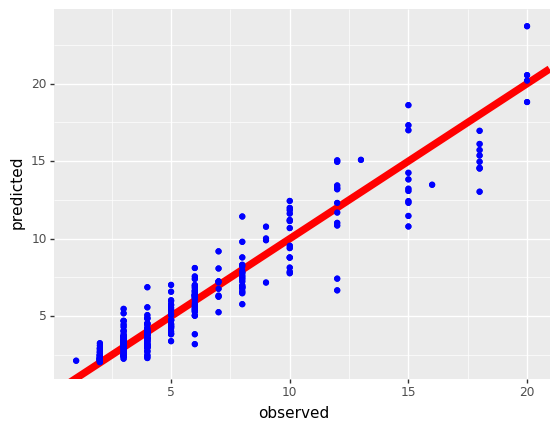

<ggplot: (-9223363253045418054)>

In [14]:
from sklearn.ensemble import RandomForestRegressor

## Define a few useful functions for diagnosing random forest models
def rmse(x, y):
    return np.sqrt(((x - y)**2).mean())

def print_rf_score(m):
    res = [
        rmse(m.predict(X_train), y_train),
        rmse(m.predict(X_test), y_test),
        m.score(X_train, y_train),
        m.score(X_test, y_test)
    ]
    if hasattr(m, 'oob_score_'): res.append(m.oob_score_)
    print(res)
    return(res)
    
## Train first RF Model
rf = RandomForestRegressor(n_jobs=-2, n_estimators=1000, min_samples_leaf = 3)
rf.fit(X_train, y_train)

## Print Diagnostics
rf_score = print_rf_score(rf)  
print(rf_score) # Note: First stat should be closer to zero, second stat should be ~1

#### Model Performance
## Comparing predicted and expected for the Test Set on Random Forest Model
test_dat['rf_predicted'] = rf.predict(X_test)

## Visualizing This
ggplot(data=test_dat, mapping=aes(
    x='nshor', y='rf_predicted')) + geom_point(color='blue') + geom_abline(
        slope=1, intercept=0, color='red',
        size=3) + geom_point(color='blue') + labs(x = 'observed', y = 'predicted')

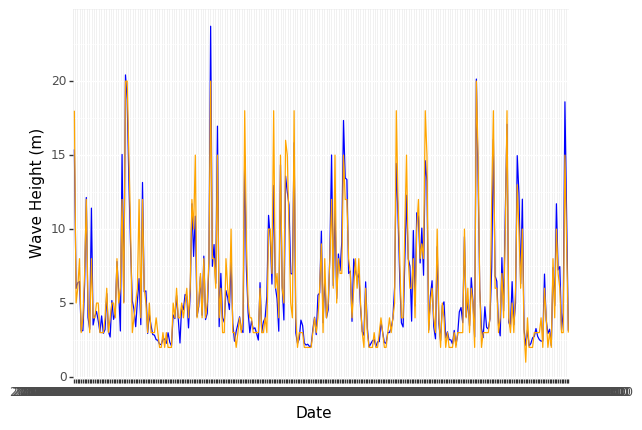

<ggplot: (-9223363260284530744)>

In [14]:
## Compare predicted and observed nearshore wave heights through time
ggplot(data = test_dat, mapping = aes(x = 'date', group = 1)) + geom_line(aes(y = 'rf_predicted'), color = 'blue') + geom_line(aes(y = 'nshor'), color = 'orange') + labs(x = 'Date', y = 'Wave Height (m)')


### Comparison to baseline model

In [15]:
## Comparing model performance to baseline
rf_rmse = rmse(y = test_dat.rf_predicted, x = test_dat.nshor)
baseline_rmse = rmse(y = test_dat.WVHT, x = test_dat.nshor)
print([rf_rmse, baseline_rmse])

[1.2603321522733346, 2.5475864050109402]


So the random forest model performs about twice as well as the baseline model and has an average root mean squared error of 1.26 m. Definitely an improvement.

Comparing the RMSE of our training and test data, the model seems to be slightly overfit. Here I'll tune the number of observations in each terminal leaf of the trees to try and rectify this. Gridsearch can tune all of the model's hyperparameters at once, but I'm going to avoid that can of worms for now.

Instead I'll focus on tuning the min_samples_leaf parameter which is the parameter that specifies the minimum required observations  to split a node. More samples in each terminal node result in greater prediction variance but result in less overfitting.

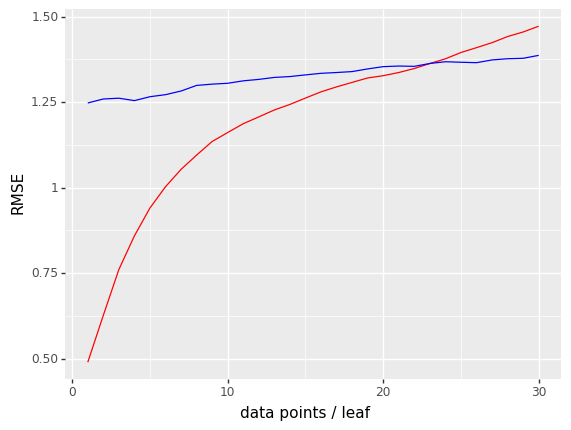

<ggplot: (8776572320653)>


In [16]:
tuning_df = pd.DataFrame({'n_samples': range(1, 31), 'RMSE_train': [0]*30, 'RMSE_test': [0]*30})

## Tuning samples per leaf
for i in range(len(tuning_df)):
    leaf_rf = RandomForestRegressor(n_jobs=-2, n_estimators=1000, min_samples_leaf = tuning_df.n_samples.loc[i])
    leaf_rf.fit(X_train, y_train)
    tuning_df.RMSE_train.loc[i] = rmse(y = y_train, x = leaf_rf.predict(X_train))
    tuning_df.RMSE_test.loc[i] = rmse(y = y_test, x = leaf_rf.predict(X_test))

## The point these converge is where we're no longer overfitting
tuned_leaf = min(tuning_df.n_samples.loc[tuning_df.RMSE_train > tuning_df.RMSE_test]) 
tuning_plot = ggplot(data = tuning_df) + geom_line(mapping = aes(x = 'n_samples', y = 'RMSE_train'), color = 'red') + geom_line(mapping = aes(x = 'n_samples', y = 'RMSE_test'), color = 'blue') + labs(x = 'data points / leaf', y = 'RMSE')

## Refit model
rf2 = RandomForestRegressor(n_jobs=-2, n_estimators=1000, min_samples_leaf = tuned_leaf)
rf2.fit(X_train, y_train)
print(tuning_plot)


At 23 samples per leaf, the RMSE of the training and test data overlap, suggesting that this is the minimum number of observations per leaf required to avoid overfitting of our model. The RMSE of the model appears to be around 1.36.

In [17]:
tuning_df.loc[tuning_df.n_samples == tuned_leaf]

,n_samples,RMSE_train,RMSE_test
23,24,1.376548,1.36802


As more observations are now required to fit a tree of the same structure, I now look for ways to regain observations lost previously during data cleaning.

### Calculating feature importance
It would be prudent at this point to see which features best predict waveheight. Since data cleaning threw out a lot of observations containing some NaN value, if the NaN values of features did not occur across the entire observation, if I eliminate that feature from the model, I can recalim that observation

WVHT 68.42 %
DPD 3.56 %
APD 24.47 %
MWD 1.32 %
WTMP 0.59 %
almo 0.12 %
dh 0.21 %
winw 0.31 %
wspd 0.28 %
wdir 0.33 %
nsd 0.39 %


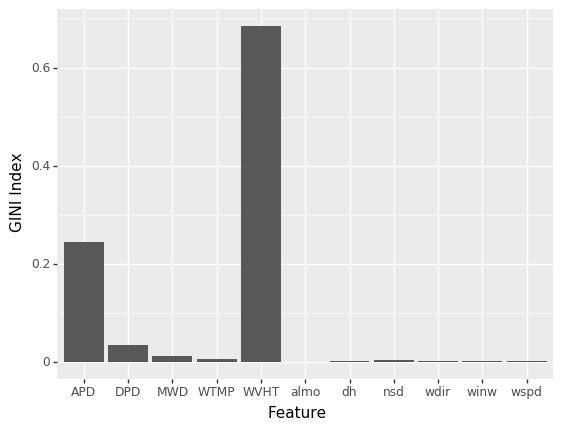

<ggplot: (8776571666843)>

In [18]:
importance = pd.DataFrame({'feature': X_train.columns, 'contribution': rf.feature_importances_})

# summarize feature importance
for i in range(len(importance)):
    print(importance.feature[i], round(importance.contribution[i]*100, 2), '%')
    
ggplot(data = importance) + geom_bar(mapping = aes(x = 'feature', y = 'contribution'), stat = 'identity') + labs(x = 'Feature', y = 'GINI Index')

Unsuprisingly, the most important feature by far is the WVHT recorded by the buoy. And after that, AVD. DPD contributes about 3% to the model, MWD 1.33%. All other features are largely unimportant.

### Refittng Model with Additional Data

Since we lost about 1/3 of our data due to missing values in features while preprocessing, lets see if removing those features prior to dropping missing values results in a larger dataset and a better model

In [19]:
## Dropping non-informative columns
threshold = 0.01 # Set a threshold of 1% to remove non-contributing features
additional_cols = list(importance.feature.loc[importance.contribution < threshold])
cols_to_drop = cols_to_drop + additional_cols
model_dat = dat.drop(cols_to_drop, axis = 1)
r = model_dat.shape[0]

## Drop all rows containing an NA value from data
model_dat = model_dat.dropna(axis = 0)
print(str(round(model_dat.shape[0] / r *100, 2)) +  '% of data retained')

## Get data summary
model_dat.describe()


96.91% of data retained


,WVHT,DPD,APD,MWD,nshor
count,2481.000000,2481.000000,2481.000000,2481.000000,2481.000000
mean,6.381220,10.847416,7.415615,197.133011,4.730351
std,2.857407,3.094802,2.211403,146.400999,4.226100
min,1.935200,3.850000,3.690000,0.000000,1.000000
25%,4.395200,8.330000,5.700000,41.000000,2.000000
50%,5.608800,10.530000,6.820000,310.000000,3.000000
75%,7.609600,13.330000,8.790000,328.000000,6.000000
max,27.781600,22.220000,15.720000,359.000000,35.000000


When only the features that are most important are kept, we about 50% more data! Note that there are some minor chances in the summary statistics associated with each predictor. Now we can refit our model and see if our accuracy (RMSE) improves. 

#### Refitting Model

In [65]:
## Split into Train and Test Data
train_dat, remaining_data = train_test_split(model_dat, test_size = 0.33)
test_dat, validate_dat = train_test_split(remaining_data, test_size = 0.5)

## Reindex train, test, validation data
train_dat.reset_index(drop=True, inplace = True)
test_dat.reset_index(drop = True, inplace = True)
validate_dat.reset_index(drop = True, inplace = True)

## Define and subset target feature
y_train = train_dat.nshor
X_train = train_dat.drop(['nshor', 'date'], axis = 1)
y_test = test_dat.nshor
X_test = test_dat.drop(['nshor', 'date'], axis = 1)

## Train first RF Model
rf2 = RandomForestRegressor(n_jobs=-2, n_estimators=1000, min_samples_leaf = tuned_leaf)
rf2.fit(X_train, y_train)

## Calculating RMSE for refit model
train_rmse = rmse(y = rf2.predict(X_train), x = train_dat.nshor)
test_rmse = rmse(y = rf2.predict(X_test), x = test_dat.nshor)
print(train_rmse)
print(test_rmse)


1.2669562658620035
1.2039263224251027


In [66]:
# Baseline model with expanded data
rmse(y = test_dat.WVHT, x = test_dat.nshor)

2.669203690892074

The model with fewer features and more data resulted in an RMSE on  test data was about 0.1 points better than the model with less data. This is encouraging as it tells me that additinal data is not dramatically improving my model fit. 

The test set narrowly out performed the training set, which is also helpful as it means I was able to remove the bias from my model by tuning the leaf parameter.

At this time, the random forest model outperforms the baseline model by a factor of two.

#### Evaluating model residuals

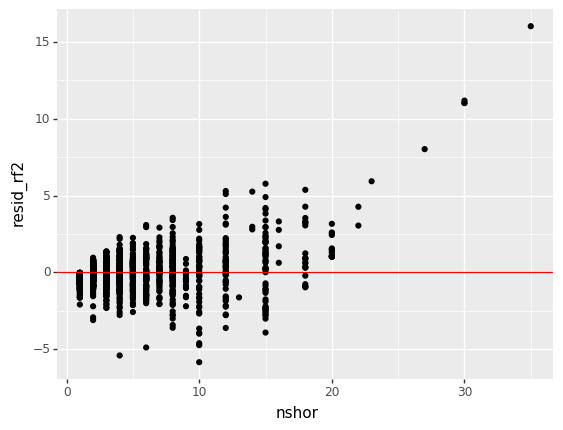

<ggplot: (-9223363260282626423)>

In [67]:
# How are our residuals distributed?
train_dat['resid_rf2'] = y_train - rf2.predict(X_train)

ggplot(data = train_dat, mapping = aes(x = 'nshor', y = 'resid_rf2')) + geom_point() + geom_abline(intercept = 0, slope = 0, color = 'red')

Residual patterns make sense considering the data source and model structure. I don't expect there to be massive residuals for low observations because when its a 3 foot day, I think the average person will have a sense that its between 2 and 4 feet versus a day when its 20 feet and maybe an observer thinks its between 17 and 25 feet (observation error scales with wave height). 

The residuals are shaped like the Loch Ness Monster because I specified 23 observations per leaf, so the rare-er observations above 20 feet are being averaged with observations less than that. Waves over 20 feet are rare, but perhaps in the future we could consider a two-stage model where we use a separate model that performs better on these rare observations when we expect waves to exceed some threshold.

### Bias checking model
Because I tuned the random forest using the test set data, it is possible that the tuning has resulted in overfitting of model hyperparameters to the test data. Now I'll use the validation data I set aside to compare Training, Test, and Validation data sets using RMSE and OOB scores, hoping that their approximately equivilant. 

In [68]:
## Define and subset target feature
y_val = validate_dat.nshor
X_val = validate_dat.drop(['nshor', 'date'], axis = 1)
y_val = validate_dat.nshor
X_val = validate_dat.drop(['nshor', 'date'], axis = 1)

rmse(rf2.predict(X_val), y_val)

1.1900872013809154

With a smaller RMSE from the validation set, I'm confident that I didn't over tune my model to the idosyncracies in training data.

## Conclusions
    - A random forest performed nearly twice as well as the baseline model
    - Most important features were measured by the Buoy and include WVHT, Average Swell Direction, and Dominant Wave Period
    - Once this was known, including more data did not appreciably improve the fit indicating that the model had sufficient data 
    - Residuals fit an pattern expected for observation and model error. In the future, perhaps a two-stage model could be used to refine model accuracy.

## Next Steps:
- Get actual tide data and see if that improves the model. Since tide data isn't available from the NS buoy, we could use another nearby buoy to get these readings (or a tide guage, talk to Phil Thompson about that?)
    - Unlikely since we're dealing with daily measurements (not on the same scale as semidiurnal tides, but maybe moon phase, as a proxy for spring and neap tides would be useful?
- Further tuning of model hyperparameters  - By hand or using grid search
- Try alternative regression strategies - XGBoost or some linear model with an interesting set of features (group swell direction, or use a squared term or something similar to account for non-linear response)

## Additional work: 16 March 2021

After meeting with Ben, I thought it would be a good idea to consider additional metrics beyond RMSE to understand model performance. 

When I think about what would make for a good/bad forecast as a surfer, I want a model that is reasonably accurate over a long period of time. That is, I don't mind a forecast that isn't perfectly accurate, as long as its within an acceptable range of accuracy. 

For example: If I arrive at the beach and the surf is supposed to be 4-5 ft, and it turns out the big sets are 6 ft, great. If its supposed to be 4-5 and the biggest sets are only 4 ft, I don't feel lied to, I probably wont even notice. However, if the forecast is 5 feet and I show up and its 2 feet, I'm going to notice and my confidence in the accuracy of that model is going to be be reduced. Similarly, if the forecast is for 14 feet waves, and I show up and its only 12 feet (ha!), I probably won't notice (to be fair, I'll also probably go eat a breakfast burrito and wait for the swell to drop).

RMSE, which I previously used, peanalizes outliers equally, which is well and good, but in the above example, there is a second component where error scales with observed wave height.

So with that in mind, I want to calculate a new metric to understand my model compared to the baseline. I propose using the fraction of days where the predicted wave height is within 20% of the observed wave height. For small observations (<5 ft), this is less than a 1ft difference, but since observations are rounded to the nearest foot, and assuming sub foot accuracy is a little ridiculous, I'll allow these observations to deviate by a foot. 

This metric I will refer to as Scaled Prediction Accuracy Metric (SPAM - It's not just a meat!) 

Functionally, when waves are observed being 5ft, the predicted range can be between 4 and 6 ft, while waves on a really big day (20 ft), can vary between 15 and 25 ft. Is the upper range of this realistic? I don't know, I don't surf waves that are 20ft plus, but in the future I could  change the scaling constant, or define a non-linear function for scaling that would account for this.

In [11]:
def spam(predicted, observed, threshold = 0.20):
    '''
    Function to calculate SPAM metric for model observed and predicted values at a given threshold
    '''
    within_threshold = []
    for i in range(len(predicted)):
        scalable_bound = observed[i] * threshold
        ## increase scalable_bound tolerance for small observations (<5 ft)
        if observed[i] < 5:
            scalable_bound = 1.0
        ## Check observations against bounds  
        within_threshold.append((observed[i] - scalable_bound) <= predicted[i] and predicted[i] <= (observed[i] + scalable_bound))
    
    spam = (sum(within_threshold)/len(within_threshold)) * 100
    print(spam)
    return(pd.DataFrame({'predicted': predicted, 'observed': observed, 'within_threshold': within_threshold}))


In [196]:
### Calculate SPAM for baseline model
# Note: For the baseline model, our predictions are the WVHTs from the buoy data, and observed are observations from the north shore
base_spam = spam(predicted = test_dat.WVHT, observed = test_dat.nshor, threshold = 0.2)

24.205378973105134


In [200]:
### Calculate SPAM for best performing RF model
rf_spam = spam(predicted = rf2.predict(X_test), observed = y_test, threshold = 0.2)

## Compare to validation data to make sure we're in the ballpark
rf_spam_valid = spam(predicted = rf2.predict(X_val), observed = y_val, threshold = 0.2)

81.90709046454768
82.68292682926828


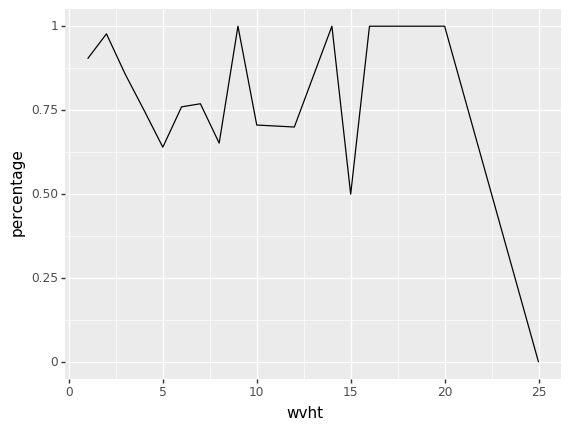

<ggplot: (-9223363260283538912)>

In [199]:
### Plotting SPAM by observation size
 # For each observed wvht, determine the fraction of observations that are within spam limits, then plot them
spam_by_wvht = pd.DataFrame(columns = ['wvht', 'percentage'])
wvhts = list(set(rf_spam.observed))
for wvht in wvhts:
    percentage = sum(rf_spam.within_threshold.loc[rf_spam.observed == wvht]) / len(rf_spam.within_threshold.loc[rf_spam.observed == wvht])
    spam_by_wvht = spam_by_wvht.append(pd.DataFrame({'wvht': [wvht], 'percentage': [percentage]}), ignore_index = True)

ggplot(data = spam_by_wvht, mapping = aes(x = 'wvht', y = 'percentage')) + geom_line()

### Conclusion
Using the SPAM metric, the random forest approach outperformed the base model by more than 3.4x. Our predictions were within SPAM on roughly 80% of all days. This means, 4 out of 5 times surfer goes to the beach, the forecast will be accurate within +/- 20% of the observed wave height.

SPAM varies by wave height. In the zone I like to surf (3-7 feet), it appears that the forecast's accuracy ranges between 60ish and 75ish percent. 

Note that SPAM is particularly bad for the largest observations, this was brought up before and is a symptom of having too few observations of the largest waveheights when fitting the RF model.

Second Note: SPAM is essentially a step because observed wvhts are integers. I don't think this is a huge problem but is something to keep in mind.

### Next Steps
Future work could involve tuning hyper parameters or trying different regression algorthms (ex: xgboost, neural net) to see if a better performing model can be produced. This work could also  combine my previous work to estimate crowd size, by trying to optimize SPAM for when the break is most frequented (if you're at a big wave spot, you probably don't care if SPAM is accurate for 3 foot waves. Conversely, if you're at a beginner beach, once waves start closing out, the forecast is no longer meaningful.

## Even More Bonus Content

**TL;DR**:
- RF models were refit with two time series approaches
- Time series additions resulted in a ~3.4% increase in model performance over time agnostic model
- Incorperating 4 previous days of history was the most effective approach (if you're into SPAM)
- A new train test split procedure is introduced to deal with lack of independence
- Models perform slightly worse than before with this method, so using this apporach has probably avoided some overfitting that previously occurred
- It's late. The code ain't pretty. I'm ok with that.

### Incorperating time series components

Following my conversatino with Gracie and Ketron on 25 March 2021, I've been thinking about how to incorperate a time series component in these models. 

Upon reflection, I think the reason I didn't try this approach earlier was that I had made a key assumption that this model should be generalizable without having to be trained more than once. That is, the purpose is to deploy a stable model into production requiring little upkeep/retraining.

If the full date column is used to incorperate a time series, the inclusion of the year value means that each observation occurs on a unique date. Because of the way RF's branch and bin data, any tree containing date will by necessity bin the latest observations with the last data collected, effectively isolating recent data from historic data. 

This doesn't seem ideal and means that unless the model is retrained regularly, when envisioning of what a split along the time feature would look like, we see the most recent data collected would all group with the most recent data used to train the model. 

### Methods
I start  by fitting a model that directly incorperates the date just to sanity check the above assertation. Then...

I've come up with **two** approaches to circumvent this while still retaining time series components (letting the model know its own history, essentially).

1. Seasonality - The first is to use only the month and day from the date component, allowing observations from one year to be binned with similar observations from prior years. This approach seems reasonable and allows data from previous year/month pairs to inform new data without the model having to be trained on the most recent data. You can think of this as accounting for seasonality.

2. History - Second, as briefly discussed durring our call thursday, the previous observed history can be embedded as a new lagging feature for the model. The model can then be aware of what happend *n* days prior to the date we're hoping to predict. This can be incorperated as part of daily data pre-processing without requiring the model to be retrained.

In the following section I try both approaches, first in a full model combining both elements, then testing each element independently, and finally fitting a model analogous to the ones I fit previously in section 4. Their performance will be evaluated using both RMSE and SPAM procedures.

Notes: 
- Because I am no longer assuming independence of observations, I can no longer use a simple random train test split and instead need to use a temporally segmented approach. 
- It's late, I'm not sure anyone will ever read this, and I don't have the patience to make my code super pretty or reusable tonight.


**Encoding seasonality as a 3/4 digit number**

Here seasonality is included by embedding month and day as a 3 or 4 digit numeric value. This lets values from January 2017 (or whatever year) be used to inform data from January 2018 (or whatever) so winter seasons are like winter seasons etc...

examples: 1 January = 101, 6 December = 1206, 25 December = 1225

In [71]:
## Remove any NA values - See discussion at the end of this section...
model_dat = model_dat.dropna(axis = 0)
model_dat.reset_index(drop=True, inplace = True)

### Convert month and day into a number represented by 3 or 4 digits
    ## To do this I use the following procedure
        # 1. Divide month and day digits by 100 - to ensure leading zero for single digit values
        # 2. Convert to string - Ensure's the zero in first 9 days of the month is retained
        # 3. join them together
        # 4. convert back to an integer 

## Create a dummy column    
model_dat['seasonality'] = 0
# Loop through and replace
for i in range(model_dat.shape[0]):
    month = str(int(str(model_dat.date.iloc[i])[5:7])/100 + 0.001)[2:4] # Have to add 0.001 to each number to avoid rounding off trailing digit if it is zero (ex: 0.10 displays as 0.1)
    day = str(int(str(model_dat.date.iloc[i])[9:11])/100 + 0.001)[2:4]
    model_dat.seasonality.iloc[i] = int(''.join([month, day]))
    

**Encoding the last 4 days of observations as an 7/8 digit number**

Similarly, the last *n* days observed values can be incorperated into the model as well. As long as someone is on the beach to report the previous day's observations, this seems like a perfectly valid approach. 

This approach exploits the non-linearity of random forests (and could be similarly used for GAMs, boosted models, neural networks, or other non-linear apporaches). Each of the prior observations are encoded as a 7 or 8 digit number similar to date. Each digit pair corrosponds to the wave height for the previous days with the tens and ones digit denoting the nth day of the history and the millionths and 10 millionths digits representing the most recent observations. 

When a branch splits, observations with similar histories will cluster together, leading to a model that knows it's own history, becomes self aware, and terminator's it's way back through time to stop John Conner... or something.

The way I've implemented it, this approach practically can only be used to evaluate one day out, but it is flexible enough that with some modification, a method for specifying the uncertainty of earlier dates that have not yet passed (and therefore observed) could be incorperated (Ex: Forecasting Wednesday's conditions on a Monday without data from Tuesday). Or maybe there's a similar model that predicts waveheight 2, 3, 4, ... n days out using a similar feature. What I'm trying to say is treat this as proof of concept, not the whole concept.

In [72]:
## Create a dummy column    
model_dat['history'] = 0

## Create a queue containing the last n observations
queue_length = 4 # Define how many observations to remember
hist_queue = [model_dat.nshor.iloc[n] for n in range(queue_length)] # Select that many obseravtions and store them in a list
hist_queue = [str(x/100 + .001)[2:4] for x in hist_queue] # Convert list elements to strings - keep trailing zero by adding .001 to ensure enough digits are present
hist_queue.reverse() # Reverse queue so most recent observations are first

## Remove the first n observations from the data - Because they do not have complete histories
model_dat = model_dat.iloc[queue_length+1:model_dat.shape[0]]

# Loop through and replace
for i in range(model_dat.shape[0]):
    # Replace 0 with previous history from previous n days
    model_dat.history.iloc[i] = int(''.join(hist_queue))
    # Remove oldest element in the queue and replace with the newest
    hist_queue.pop()
    hist_queue.reverse()
    hist_queue.append(str(model_dat.nshor.iloc[i]/100 + 0.001)[2:4]) # Have to ad .001 to make sure trailing zeros are present
    hist_queue.reverse()    

**Temporal Train Test Split**

Because the data is now being treated as time series, it needs to be split not randomly, but in a sequential train test manner so that observations in the test data aren't correlated with training observations (especially problematic modeling with dates).

In [73]:
## Drop all columns of data that we're not concerned with (note: I re ran the analysis throught he Exploritory Data Analaysis section, hence having to do this)
model_dat = model_dat.drop(['winw', 'wspd', 'wdir', 'nsd', 'dh', 'almo'], axis = 1)
model_dat.reset_index(drop=True, inplace = True)

## Convert date to datetime float - difference between  start of ts and curent obs
model_dat['date'] = (pd.to_datetime(model_dat['date']) - pd.to_datetime(model_dat['date']).min())  / np.timedelta64(1,'D')

## Split into temporal train (60%), test (20%), validate(20%) data
# Get index positions for split
train_i = int(round(.60*model_dat.shape[0])) # get an integer value for the number of observations in 60% of the data
test_i = int(round(.20*model_dat.shape[0])) # get an integer value for the number of observations in 20% of the data

# Split data into train, test, validation
train_dat = model_dat.loc[0:train_i]
test_dat = model_dat.loc[train_i:(train_i)+test_i]
validate_dat = model_dat.loc[(train_i)+test_i:len(model_dat)]

## Reindex train, test, validation data
train_dat.reset_index(drop=True, inplace = True)
test_dat.reset_index(drop = True, inplace = True)
validate_dat.reset_index(drop = True, inplace = True)


**Baseline model without seasonality, history, or date information**

In [78]:
## Remove history embedding
X_train0 = train_dat.drop(['nshor', 'seasonality', 'history', 'date'], axis = 1)
X_test0 = test_dat.drop(['nshor', 'seasonality', 'history', 'date'], axis = 1)

## Train first RF Model
rf_b = RandomForestRegressor(n_jobs=-2, n_estimators=1000, min_samples_leaf = 23)
rf_b.fit(X_train0, y_train)

## Calculating RMSE for refit model
train_rmse = rmse(y = rf_B.predict(X_train0), x = train_dat.nshor)
test_rmse = rmse(y = rf_b.predict(X_test0), x = test_dat.nshor)
print('train rmse:', train_rmse)
print('test rmse:', test_rmse)

## Calculate SPAM
sp_base = spam(predicted = rf_b.predict(X_test0), observed = y_test, threshold = 0.2)

train rmse: 1.3534102128798753
test rmse: 1.2960720257161855
77.90368271954674


**Model with date directly added**

In [83]:
## Fit model using time 
## Define and subset target feature

y_train = train_dat.nshor
X_train4 = train_dat.drop(['nshor', 'seasonality', 'history'], axis = 1)
y_test = test_dat.nshor
X_test4 = test_dat.drop(['nshor','seasonality', 'history'], axis = 1)

## Train first RF Model
rf_date = RandomForestRegressor(n_jobs=-2, n_estimators=1000, min_samples_leaf = 23)
rf_date.fit(X_train4, y_train)

## Calculating RMSE for refit model
train_rmse = rmse(y = rf_date.predict(X_train4), x = train_dat.nshor)
test_rmse = rmse(y = rf_date.predict(X_test4), x = test_dat.nshor)
print('train rmse:', train_rmse)
print('test rmse:', test_rmse)

## Calculate SPAM
sp_date_and_hist = spam(predicted = rf_date.predict(X_test4), observed = y_test, threshold = 0.2)


train rmse: 1.3489284522259415
test rmse: 1.2991702789680621
78.18696883852692


**Model with seasonality and recent history**

Here I fit a full model with both recent (4 days) of history, as well as the month/date of the observation. I'll compare RMSE and SPAM for the full model against child models and eventually a base model similar to the one used above (but fit with the temporal train test data).

In [82]:
## Fit model using 
## Define and subset target feature
X_train = train_dat.drop(['nshor', 'date'], axis = 1)
X_test = test_dat.drop(['nshor', 'date'], axis = 1)

## Train first RF Model
rf_sh = RandomForestRegressor(n_jobs=-2, n_estimators=1000, min_samples_leaf = 23)
rf_sh.fit(X_train, y_train)

## Calculating RMSE for refit model
train_rmse = rmse(y = rf_sh.predict(X_train), x = train_dat.nshor)
test_rmse = rmse(y = rf_sh.predict(X_test), x = test_dat.nshor)
print('train rmse:', train_rmse)
print('test rmse:', test_rmse)

## Calculate SPAM
sp_date_and_hist = spam(predicted = rf_sh.predict(X_test), observed = y_test, threshold = 0.2)

train rmse: 1.3286694591119759
test rmse: 1.2660389250833903
80.73654390934844


**Model with recent history but without seasonality or date**

In [79]:
## Remove date embedding
X_train1 = train_dat.drop(['nshor', 'seasonality', 'date'], axis = 1)
X_test1 = test_dat.drop(['nshor', 'seasonality', 'date'], axis = 1)

## Train first RF Model
rf_h = RandomForestRegressor(n_jobs=-2, n_estimators=1000, min_samples_leaf = 23)
rf_h.fit(X_train1, y_train)

## Calculating RMSE for refit model
train_rmse = rmse(y = rf_h.predict(X_train1), x = train_dat.nshor)
test_rmse = rmse(y = rf_h.predict(X_test1), x = test_dat.nshor)
print('train rmse:', train_rmse)
print('test rmse:', test_rmse)

## Calculate SPAM
sp_hist = spam(predicted = rf_h.predict(X_test1), observed = y_test, threshold = 0.2)

train rmse: 1.337716503316272
test rmse: 1.2759138504535237
81.30311614730878


**Model with seasonality but without history or date information**

In [77]:
## Remove history embedding
X_train2 = train_dat.drop(['nshor', 'history', 'date'], axis = 1)
X_test2 = test_dat.drop(['nshor', 'history', 'date'], axis = 1)

## Train first RF Model
rf3 = RandomForestRegressor(n_jobs=-2, n_estimators=1000, min_samples_leaf = 23)
rf3.fit(X_train2, y_train)

## Calculating RMSE for refit model
train_rmse = rmse(y = rf3.predict(X_train2), x = train_dat.nshor)
test_rmse = rmse(y = rf3.predict(X_test2), x = test_dat.nshor)
print('train rmse:', train_rmse)
print('test rmse:', test_rmse)

## Calculate SPAM
sp_date = spam(predicted = rf3.predict(X_test2), observed = y_test, threshold = 0.2)

train rmse: 1.3517141094617753
test rmse: 1.2933059355270269
78.47025495750708


### Results
- The the observed height predicted by the best model is within 20% of observed value on more than 81% of all days!
- History alone out performed seasonality, but both is mo' betta.
- The model including only a history of last 4 ground truthed observations performed the best on the basis of RMSE and identically to the full model on the basis of SPAM 
- All models including time-series components provided improvement over the base model with respect to RMSE and SPAM. 
- Directly incorperating datetime directly into the model fit about as well as the base case

### Issues with this approach: 
- Imputing missing values? 
    - Its possible (in fact probable) that when I discarded NA values, I interupted the sequential nature of the data. This means that the next several histories may be inaccurate (ie: a 4 day history contains data for the last 5 days, with one day randomly ommitted, corrupting the sequence)
        - To remedy this, I could check for sequential dates and use a huge integer (like 99) for indicate missing values. This should still work with logic of RF approach and the way branches split
- Some overfitting is occurring

### Next Steps:
- Model hyperparameters are untuned (I used previous values for leaf_node). Optimizing hyperparameters might result in better fits. This would also justify the validation data I partitioned but never used.
    - It's possible with fewer leafs in each terminal node, seasonality bins would narrow and perhaps fit better? Same could be said for history I suppose...
- Experiment with the history term - how many days of "memory" are optimal?
- Incorperate additional temporal signals by weighting data to give more leverage to recent observations

*CONGRATULATIONS! YOU'VE MADE IT THIS FAR!*